In [ ]:
import pandas as pd
import numpy as np
!pip install wfdb
import wfdb
import ast
from tqdm import tqdm
import warnings; warnings.filterwarnings('ignore')
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 2.8 MB/s eta 0:00:00


In [ ]:
from zipfile import ZipFile

zip_path = "/content/drive/MyDrive/_PTB-XL_ECG_dataset/archive (1).zip"

extract_to = "/content/drive/MyDrive/_PTB-XL_ECG_dataset/data"

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Giải nén thành công!")

Giải nén thành công!


In [ ]:
!du -sh /content/drive/MyDrive/_PTB-XL_ECG_dataset/data

2.1G	/content/drive/MyDrive/_PTB-XL_ECG_dataset/data


In [ ]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in tqdm(df.filename_lr)]
    else:
        data = [wfdb.rdsamp(path+f) for f in tqdm(df.filename_hr)]
    data = np.array([signal for signal, meta in data])
    return data

In [ ]:
path = '/content/drive/MyDrive/_PTB-XL_ECG_dataset/data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/'
sampling_rate=100

# load and convert annotation data
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

# Load raw signal data
X = load_raw_data(Y, sampling_rate, path)

print('data shpae:', X.shape)
Y[['scp_codes']]
Y

100%|██████████| 21837/21837 [2:53:17<00:00,  2.10it/s]


data shpae: (21837, 1000, 12)


,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21834,20703.0,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr


In [ ]:
Y.to_csv('/content/drive/MyDrive/Y_data.csv', index=True)

np.save('/content/drive/MyDrive/X_data.npy', X)


In [ ]:
# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]
print(agg_df.shape)
agg_df.head()

(44, 12)


,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7


In [ ]:
def aggregate_supclass_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_supclass_diagnostic)
Y['diagnostic_superclass_len'] = Y['diagnostic_superclass'].apply(len)
Y.loc[Y.diagnostic_superclass_len > 1, 'diagnostic_superclass']

,diagnostic_superclass
ecg_id,
39,"[MI, STTC]"
45,"[CD, HYP]"
50,"[MI, CD]"
77,"[MI, CD]"
87,"[CD, STTC]"
...,...
21815,"[MI, CD]"
21821,"[CD, NORM]"
21827,"[MI, STTC]"


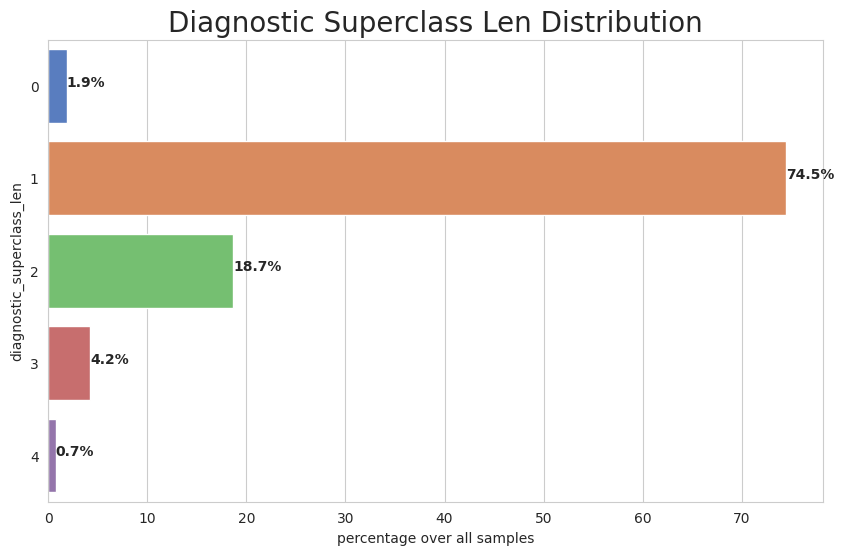

In [ ]:
#Number of Superclass per ECG record
vc = Y['diagnostic_superclass_len'].value_counts()

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/vc.values.sum()*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnostic Superclass Len Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnostic_superclass_len")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

In [ ]:
#Number of Subclass per ECG record
def aggregate_subclass_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_subclass)
    ret = list(set(tmp))
    ret = ['sub_'+r for r in ret] # to distinguish between subclass and superclass columns
    return ret

# Apply diagnostic subclass
Y['diagnostic_subclass'] = Y.scp_codes.apply(aggregate_subclass_diagnostic)
Y['diagnostic_subclass_len'] = Y['diagnostic_subclass'].apply(len)
Y.loc[Y.diagnostic_subclass_len > 1, 'diagnostic_subclass']

,diagnostic_subclass
ecg_id,
26,"[sub_NST_, sub_STTC]"
28,"[sub_NST_, sub_STTC]"
39,"[sub_NST_, sub_IMI, sub_STTC]"
45,"[sub_RVH, sub_IRBBB, sub_RAO/RAE]"
50,"[sub_IVCD, sub_LMI]"
...,...
21821,"[sub_NORM, sub_IRBBB]"
21827,"[sub_IMI, sub_ISCA]"
21828,"[sub_IMI, sub_ISCA]"


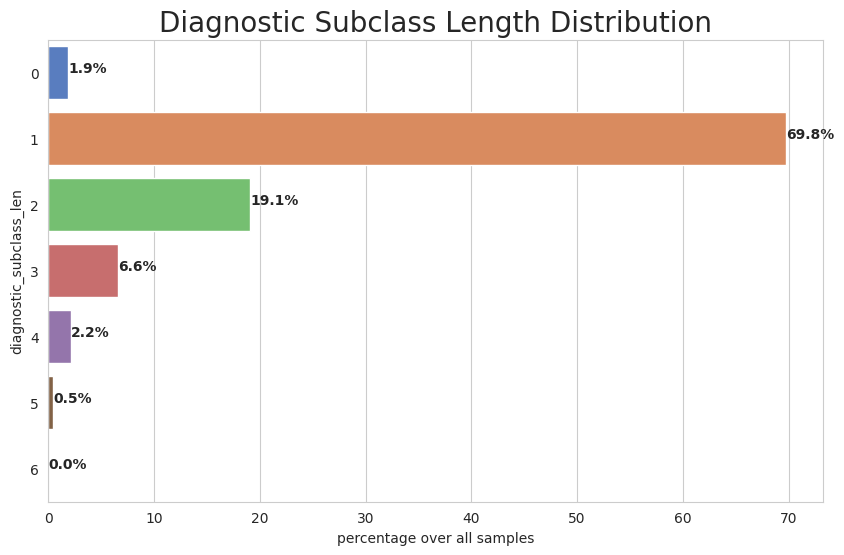

In [ ]:
vc = Y['diagnostic_subclass_len'].value_counts()

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/vc.values.sum()*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnostic Subclass Length Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnostic_subclass_len")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )


In [ ]:
Y.columns.tolist()

['patient_id',
 'age',
 'sex',
 'height',
 'weight',
 'nurse',
 'site',
 'device',
 'recording_date',
 'report',
 'scp_codes',
 'heart_axis',
 'infarction_stadium1',
 'infarction_stadium2',
 'validated_by',
 'second_opinion',
 'initial_autogenerated_report',
 'validated_by_human',
 'baseline_drift',
 'static_noise',
 'burst_noise',
 'electrodes_problems',
 'extra_beats',
 'pacemaker',
 'strat_fold',
 'filename_lr',
 'filename_hr',
 'diagnostic_superclass',
 'diagnostic_superclass_len',
 'diagnostic_subclass',
 'diagnostic_subclass_len']

In [ ]:
#Reformat Data for EDA
all_superclass = pd.Series(np.concatenate(Y['diagnostic_superclass'].values))
all_subclass = pd.Series(np.concatenate(Y['diagnostic_subclass'].values))
superclass_cols = all_superclass.unique()
subclass_cols = all_subclass.unique()
update_cols = np.concatenate([superclass_cols, subclass_cols]) # add meta data columns
meta_cols = ['age', 'sex', 'height', 'weight', 'nurse', 'site', 'device',] # could add more columns as features

In [ ]:
class ClassUpdate():
    def __init__(self, cols):
        self.cols = cols

    def __call__(self, row):
        for sc in row['diagnostic_superclass']:
            row[sc] = 1
        for sc in row['diagnostic_subclass']:
            row[sc] = 1

        return row

def get_data_by_folds(folds, x, y, update_cols, feature_cols):
    assert len(folds)  > 0, '# of provided folds should longer than 1'
    #print(y.strat_fold)
    filt = np.isin(y.strat_fold.values, folds)
    x_selected = x[filt]
    y_selected = y[filt]

    for sc in update_cols:
        y_selected[sc] = 0

    cls_updt = ClassUpdate(update_cols)

    y_selected = y_selected.apply(cls_updt, axis=1)

    return x_selected, y_selected[list(feature_cols)+list(update_cols)+['strat_fold']]

In [ ]:
x_all, y_all = get_data_by_folds(np.arange(1, 11), X, Y, update_cols, meta_cols)

In [ ]:
y_all

,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,...,sub_ISC_,sub_SEHYP,sub_ISCI,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_WPW,sub_PMI,strat_fold
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,3
2,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,2
3,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,5
4,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,3
5,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,0,0,1,...,0,0,0,0,0,0,0,0,0,7
21834,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,4
21835,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,0,0,1,...,0,0,0,0,0,0,0,0,0,2


In [1]:
#Superclass Distribution
vc = y_all[superclass_cols].sum(axis=0)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/y_all.shape[0]*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnositic Superclass Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnositic superclass")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

NameError: name 'Y_test' is not defined

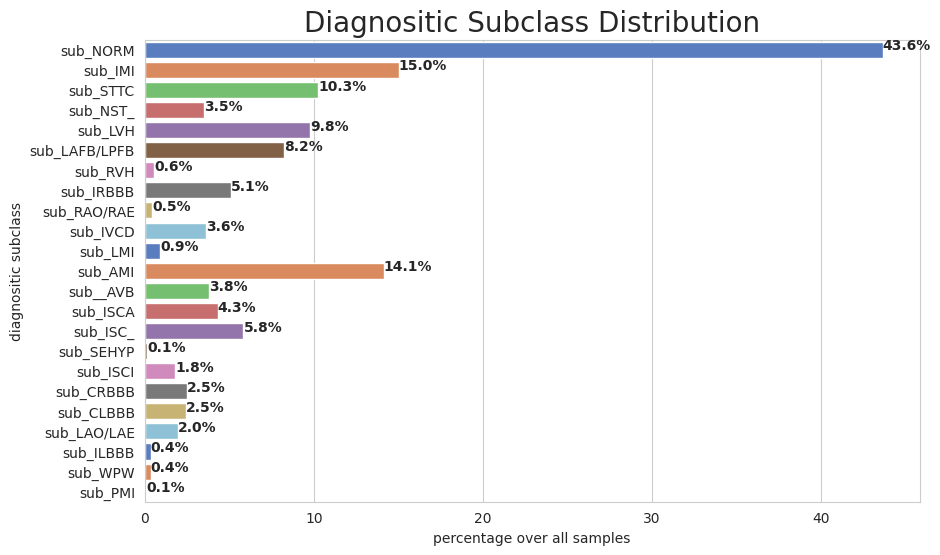

In [ ]:
#Subclass Distribution
vc = y_all[subclass_cols].sum(axis=0)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/y_all.shape[0]*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnositic Subclass Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnositic subclass")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

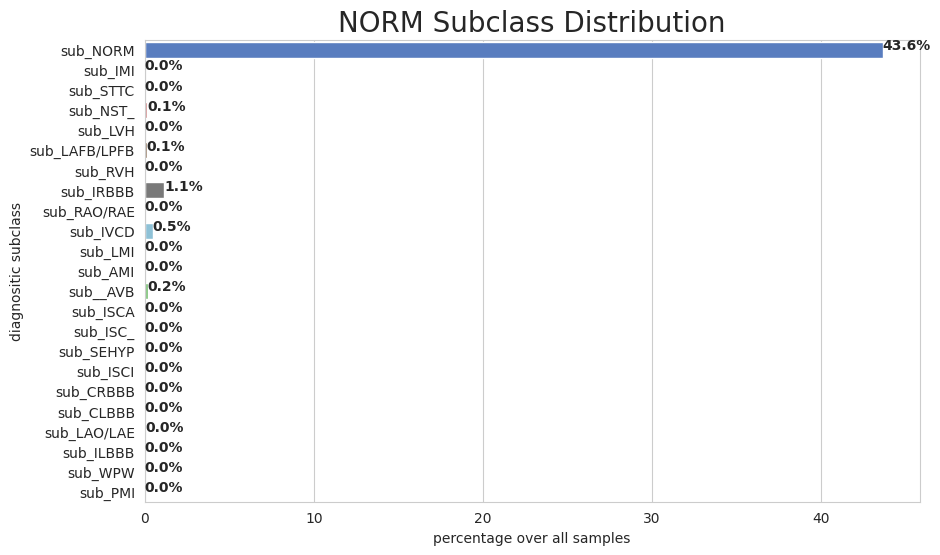

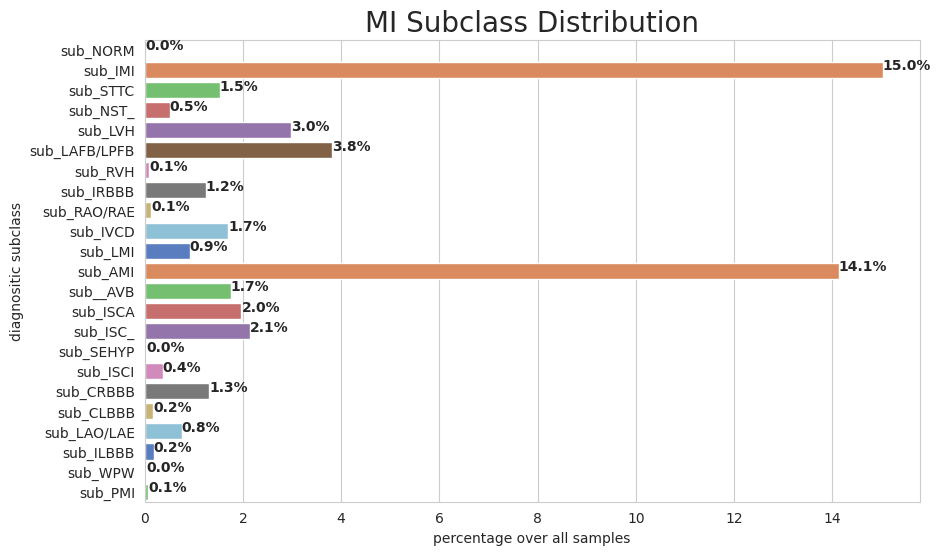

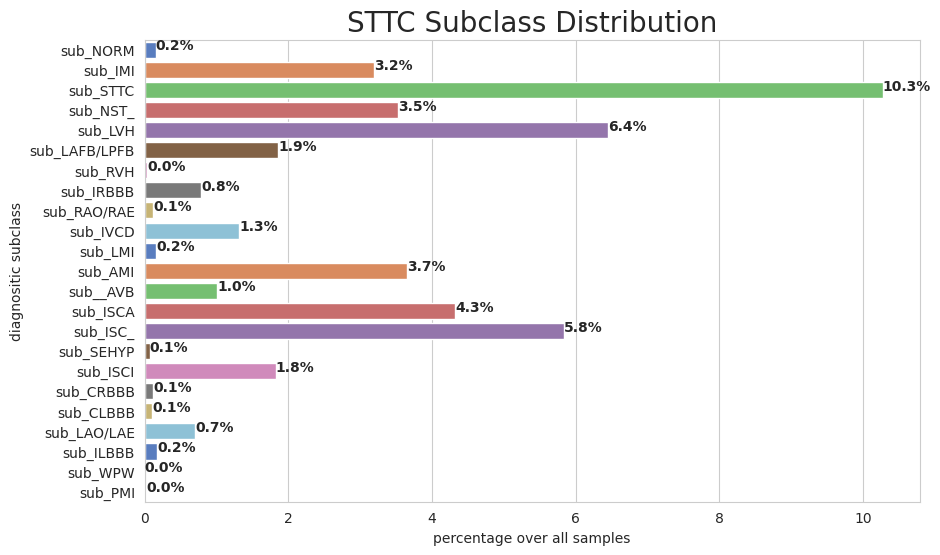

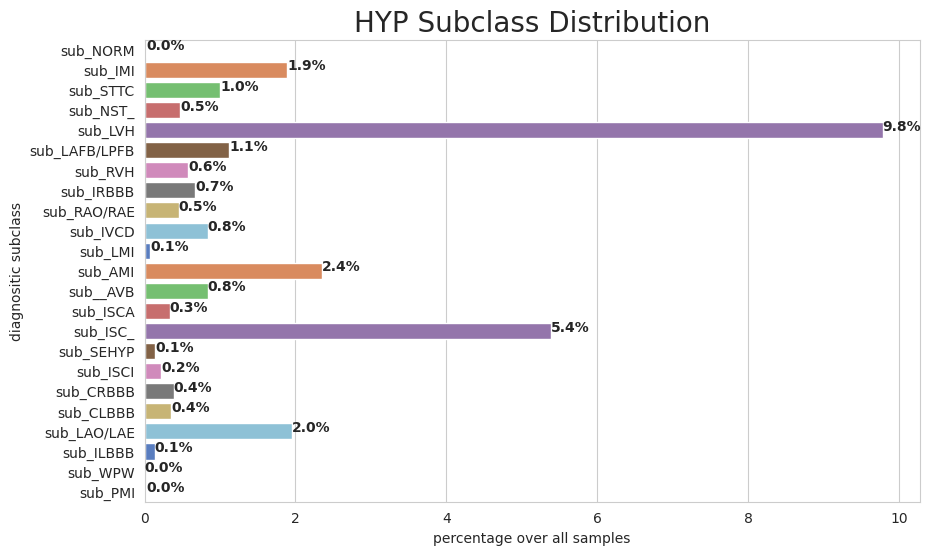

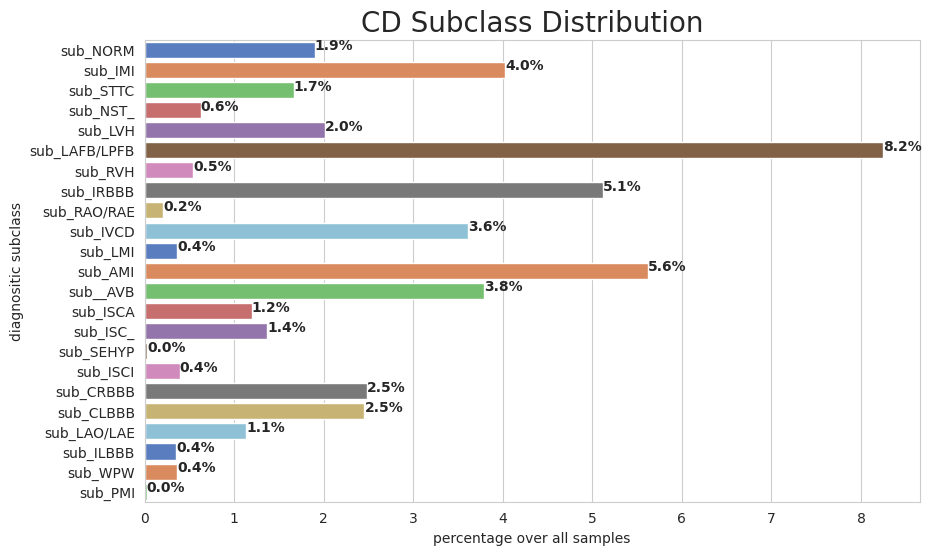

In [ ]:
#Subclass Distribution of each Superclass
for superclass in superclass_cols:

    vc = y_all.loc[y_all[superclass] == 1][subclass_cols].sum(axis=0)

    sns.set_style("whitegrid")
    bar,ax = plt.subplots(figsize=(10,6))
    ax = sns.barplot(x=vc.values/y_all.shape[0]*100., y=vc.index, ci=None, palette="muted",orient='h' )
    ax.set_title("{} Subclass Distribution".format(superclass), fontsize=20)
    ax.set_xlabel ("percentage over all samples")
    ax.set_ylabel ("diagnositic subclass")
    for rect in ax.patches:
        ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

In [ ]:
meta_cols

['age', 'sex', 'height', 'weight', 'nurse', 'site', 'device']

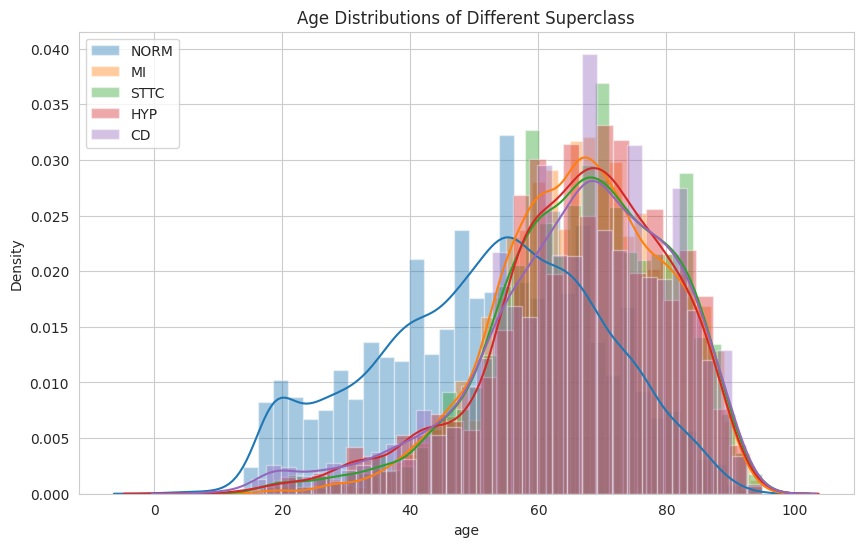

In [ ]:
#Per Superclass Age Distribution
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Age Distributions of Different Superclass')

for superclass in superclass_cols:
    data = y_all.loc[y_all[superclass] == 1]['age']
    sns.distplot(data, label=superclass)


plt.legend(loc='upper left')
plt.show()

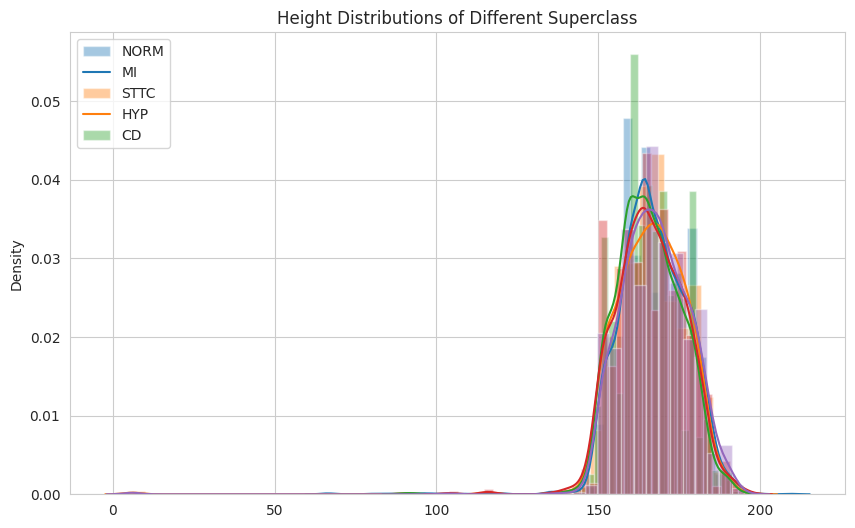

In [ ]:
#Per Superclass Height Distribution
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Height Distributions of Different Superclass')

for superclass in superclass_cols:
    data = y_all.loc[y_all[superclass] == 1][['height']]
    sns.distplot(data, label=superclass)

plt.legend(labels=superclass_cols, loc='upper left')
plt.show()

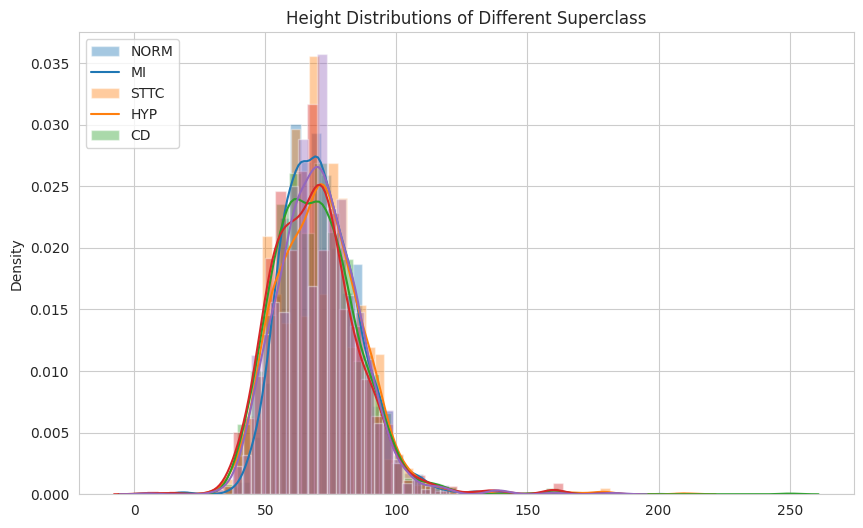

In [ ]:
#Per Superclass Weight Distribution
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Height Distributions of Different Superclass')

for superclass in superclass_cols:
    data = y_all.loc[y_all[superclass] == 1][['weight']]
    sns.distplot(data, label=superclass)

plt.legend(labels=superclass_cols, loc='upper left')
plt.show()

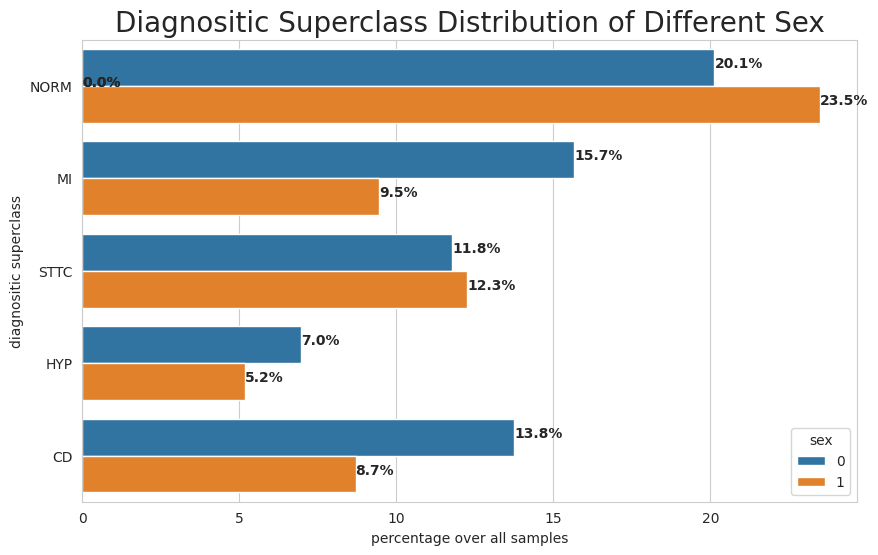

In [ ]:
#Per Sex Superclass Distribution
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))

ax.set_title("Diagnositic Superclass Distribution of Different Sex", fontsize=20)

all_index, all_count, all_values = [], [], []
for sex in y_all.sex.unique():
    vc = y_all.loc[y_all.sex == sex][superclass_cols].sum(axis=0)
    all_index += list(vc.index)
    all_count += list(vc.values/y_all.shape[0]*100.)
    all_values += [sex]*len(vc)
    #print(all_sex)

df = pd.DataFrame()
df['diagnositic superclass'] = all_index
df['percentage over all samples'] = all_count
df['sex'] = all_values

ax = sns.barplot(data=df, x="percentage over all samples", y="diagnositic superclass", hue="sex",ci=None, orient='h')
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold')

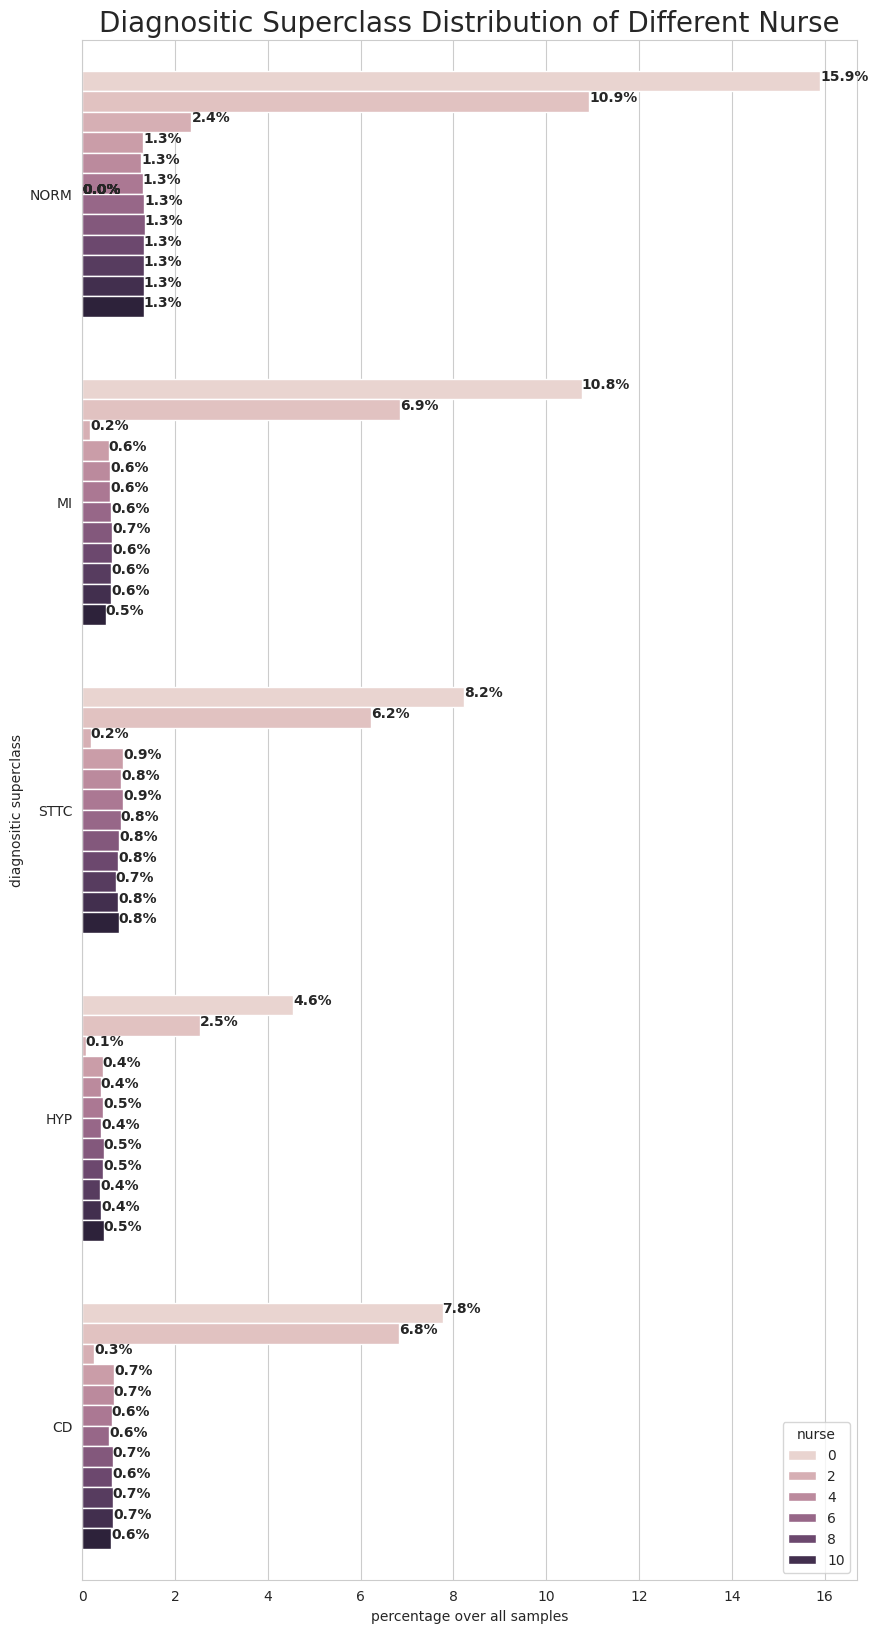

In [ ]:
#Per Nurse Superclass Distribution
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,20))

ax.set_title("Diagnositic Superclass Distribution of Different Nurse", fontsize=20)

all_index, all_count, all_values = [], [], []
for nurse in y_all.nurse.unique():
    vc = y_all.loc[y_all.nurse == nurse][superclass_cols].sum(axis=0)
    all_index += list(vc.index)
    all_count += list(vc.values/y_all.shape[0]*100.)
    all_values += [nurse]*len(vc)
    #print(all_sex)

df = pd.DataFrame()
df['diagnositic superclass'] = all_index
df['percentage over all samples'] = all_count
df['nurse'] = all_values

ax = sns.barplot(data=df, x="percentage over all samples", y="diagnositic superclass", hue="nurse",ci=None, orient='h')
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold')

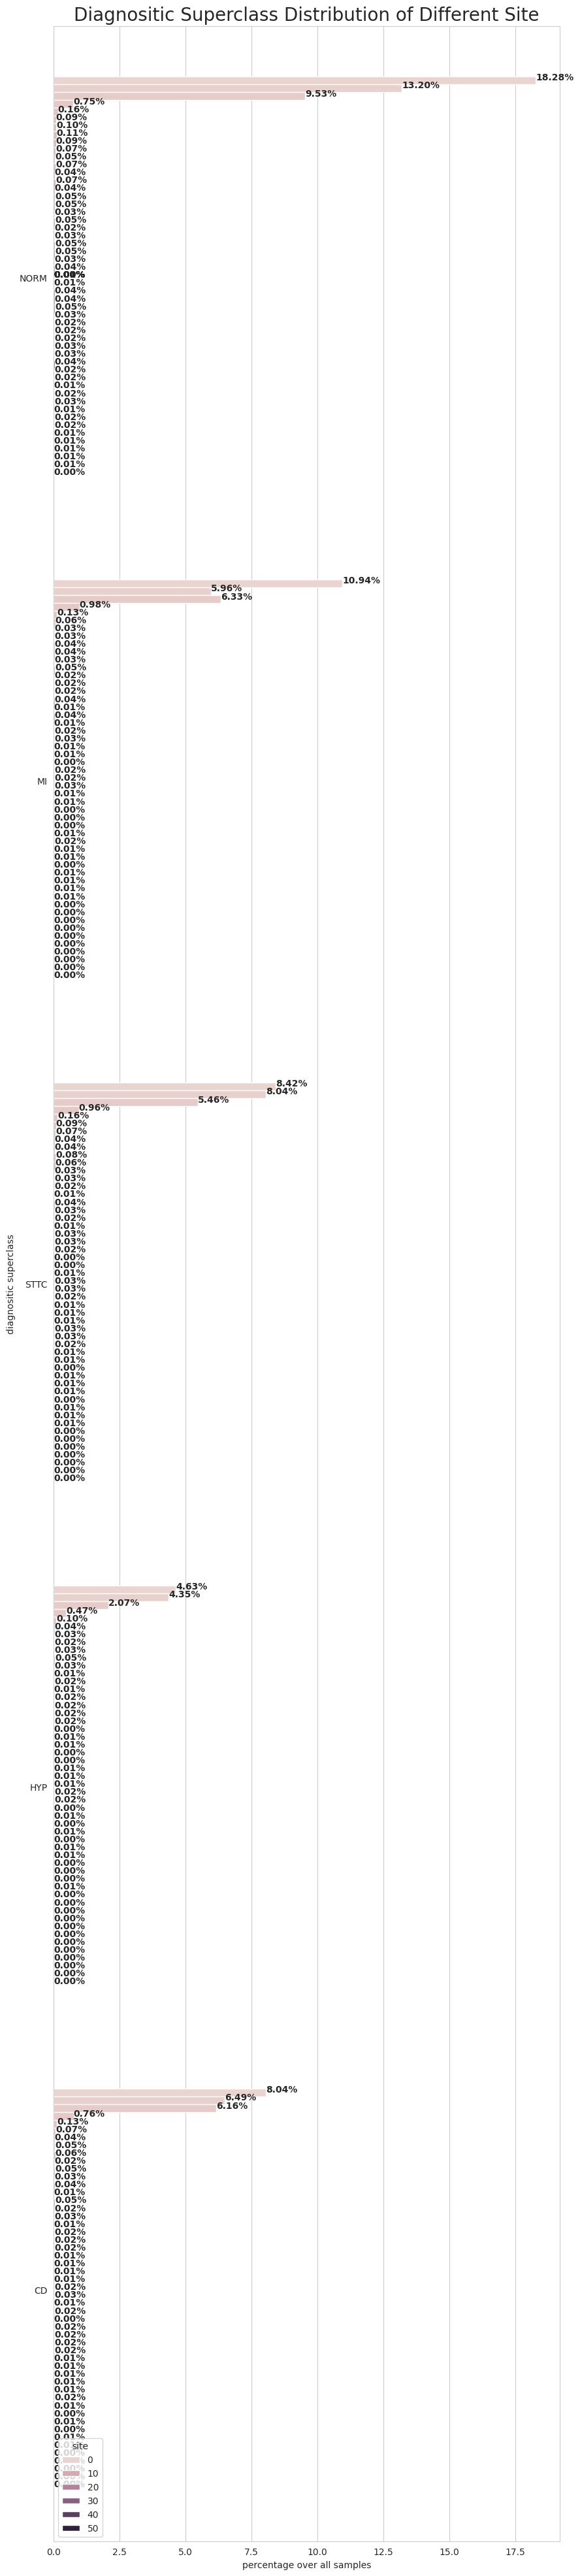

In [ ]:
#Per Site Superclass Distribution
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,50))

ax.set_title("Diagnositic Superclass Distribution of Different Site", fontsize=20)

all_index, all_count, all_values = [], [], []
for site in y_all.site.unique():
    vc = y_all.loc[y_all.site == site][superclass_cols].sum(axis=0)
    all_index += list(vc.index)
    all_count += list(vc.values/y_all.shape[0]*100.)
    all_values += [site]*len(vc)
    #print(all_sex)

df = pd.DataFrame()
df['diagnositic superclass'] = all_index
df['percentage over all samples'] = all_count
df['site'] = all_values

ax = sns.barplot(data=df, x="percentage over all samples", y="diagnositic superclass", hue="site",ci=None, orient='h')
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.2f%%"% rect.get_width(), weight='bold')

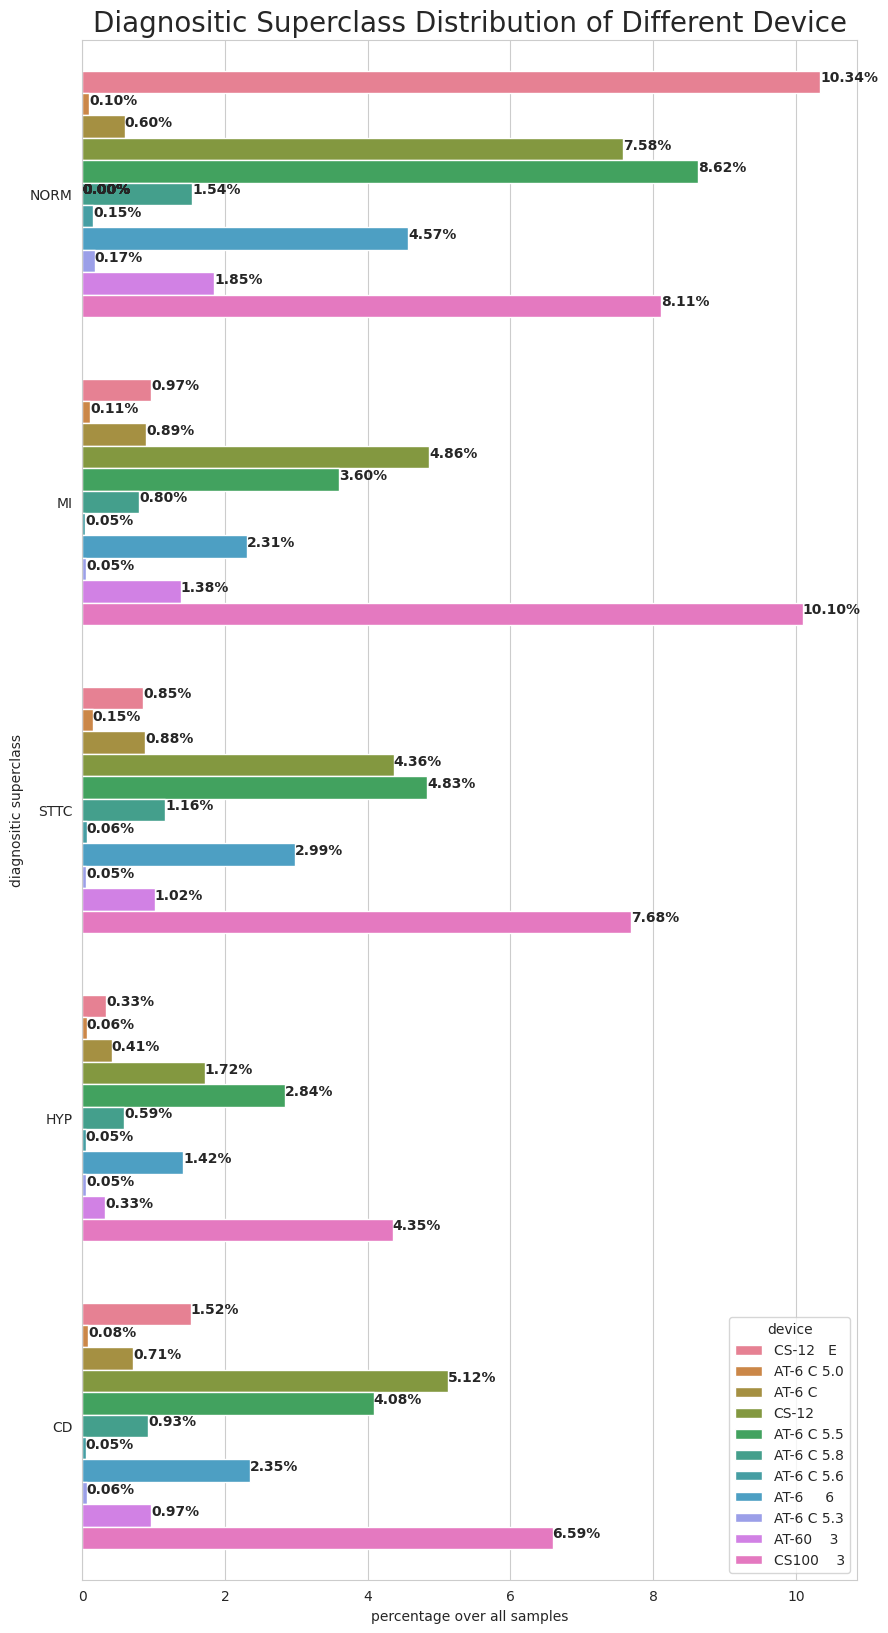

In [ ]:
#Per Device Superclass Distribution
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,20))

ax.set_title("Diagnositic Superclass Distribution of Different Device", fontsize=20)

all_index, all_count, all_values = [], [], []
for device in y_all.device.unique():
    vc = y_all.loc[y_all.device == device][superclass_cols].sum(axis=0)
    all_index += list(vc.index)
    all_count += list(vc.values/y_all.shape[0]*100.)
    all_values += [device]*len(vc)
    #print(all_sex)

df = pd.DataFrame()
df['diagnositic superclass'] = all_index
df['percentage over all samples'] = all_count
df['device'] = all_values

ax = sns.barplot(data=df, x="percentage over all samples", y="diagnositic superclass", hue="device",ci=None, orient='h')
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.2f%%"% rect.get_width(), weight='bold')

In [ ]:
#Per Superclass ECG Examples
sample_num = 5

for superclass in superclass_cols:
    filt = y_all[superclass] == 1
    y_selected = y_all.loc[filt]
    x_selected = x_all[filt]

    for i in range(sample_num):
        y_ = y_selected.iloc[i]
        x_ = x_selected[i]

        #display(y_)
        #print(y_.shape, x_.shape); assert False
        bar, axes = plt.subplots(x_.shape[1], 1, figsize=(10,10))
        title = "Superclass = {}, Age = {}, Height = {}, Weight = {}, Sex = {}, Nurse = {}, Site = {}, Device = {}".format(superclass,
                                                                                                                           y_['age'], y_['height'], y_['weight'],
                                                                                                                           y_['sex'], y_['nurse'], y_['site'], y_['device'],)
        axes[0].set_title(title, fontsize=15)

        for c in np.arange(x_.shape[1]):
            sns.lineplot(x=np.arange(x_.shape[0]), y=x_[:, c], ax=axes[c])

        plt.tight_layout()
        plt.show()
        #assert False

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Train
x_train, y_train = get_data_by_folds(np.arange(1, 9), X, Y, update_cols, meta_cols)
print('data shape', x_train.shape)
y_train

data shape (17441, 1000, 12)


,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,...,sub_ISC_,sub_SEHYP,sub_ISCI,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_WPW,sub_PMI,strat_fold
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,3
2,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,2
3,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,5
4,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,3
5,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21832,63.0,0,NaN,NaN,1.0,2.0,AT-60 3,0,0,0,...,0,0,0,0,0,0,0,0,0,7
21833,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,0,0,1,...,0,0,0,0,0,0,0,0,0,7
21834,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,4


In [ ]:
np.save('/content/drive/MyDrive/data_train/x_train.npy', x_train)
np.save('/content/drive/MyDrive/data_train/y_train.npy', y_train)

In [ ]:
#Valid
x_valid, y_valid = get_data_by_folds([9], X, Y, update_cols, meta_cols)
print('data shape', x_valid.shape)
y_valid

data shape (2193, 1000, 12)


,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,...,sub_ISC_,sub_SEHYP,sub_ISCI,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_WPW,sub_PMI,strat_fold
ecg_id,,,,,,,,,,,,,,,,,,,,,
8,48.0,0,NaN,95.0,2.0,0.0,CS-12 E,0,1,0,...,0,0,0,0,0,0,0,0,0,9
10,22.0,1,NaN,56.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,9
17,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,0,0,0,...,0,0,0,0,0,0,0,0,0,9
18,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,0,0,0,...,0,0,0,0,0,0,0,0,0,9
20,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21777,54.0,0,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,9
21788,72.0,1,NaN,NaN,1.0,2.0,AT-60 3,0,1,0,...,0,0,0,0,0,0,0,0,0,9
21817,66.0,0,NaN,NaN,1.0,2.0,AT-60 3,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [ ]:
np.save('/content/drive/MyDrive/data_train/x_valid.npy', x_valid)
np.save('/content/drive/MyDrive/data_train/y_valid.npy', y_valid)

In [ ]:
#Test
x_test, y_test = get_data_by_folds([10], X, Y, update_cols, meta_cols)
print('data shape', x_test.shape)
y_test

data shape (2203, 1000, 12)


,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,...,sub_ISC_,sub_SEHYP,sub_ISCI,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_WPW,sub_PMI,strat_fold
ecg_id,,,,,,,,,,,,,,,,,,,,,
9,55.0,0,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
38,40.0,0,NaN,72.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
40,60.0,0,NaN,85.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
57,26.0,0,NaN,93.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
59,54.0,0,NaN,67.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21809,69.0,1,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,10
21812,67.0,0,NaN,NaN,1.0,2.0,AT-60 3,0,0,0,...,0,0,0,1,0,0,0,0,0,10
21818,84.0,1,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,10


In [ ]:
np.save('/content/drive/MyDrive/data_train/x_test.npy', x_test)
np.save('/content/drive/MyDrive/data_train/y_test.npy', y_test)

In [ ]:
id_cols = ['ecg_id']
channel_cols = ['channel-{}'.format(i) for i in range(12)]

y_train.to_csv('train_meta.csv', index=True)
y_train_signal = pd.DataFrame(columns=id_cols+channel_cols, index=np.arange(y_train.shape[0]*1000), dtype=np.float32)

ecg_ids = []
signals = []
for i, ecg_id in enumerate(y_train.index.values):
    y_train_signal.loc[i*1000:(i+1)*1000-1, 'ecg_id'] = [ecg_id]*1000
    y_train_signal.loc[i*1000:(i+1)*1000-1, channel_cols] = x_train[i,:,:]

y_train_signal['ecg_id'] = y_train_signal['ecg_id'].astype(np.int64)
y_train_signal.to_csv('train_signal.csv', index=False)

display(y_train)
display(y_train_signal)

,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,...,sub_ISC_,sub_SEHYP,sub_ISCI,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_WPW,sub_PMI,strat_fold
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,3
2,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,2
3,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,5
4,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,3
5,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21832,63.0,0,NaN,NaN,1.0,2.0,AT-60 3,0,0,0,...,0,0,0,0,0,0,0,0,0,7
21833,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,0,0,1,...,0,0,0,0,0,0,0,0,0,7
21834,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,4


,ecg_id,channel-0,channel-1,channel-2,channel-3,channel-4,channel-5,channel-6,channel-7,channel-8,channel-9,channel-10,channel-11
0,1,-0.119,-0.055,0.064,0.086,-0.091,0.004,-0.069,-0.031,0.000,-0.026,-0.039,-0.079
1,1,-0.116,-0.051,0.065,0.083,-0.090,0.006,-0.064,-0.036,-0.003,-0.031,-0.034,-0.074
2,1,-0.120,-0.044,0.076,0.082,-0.098,0.016,-0.058,-0.034,-0.010,-0.028,-0.029,-0.069
3,1,-0.117,-0.038,0.080,0.077,-0.098,0.021,-0.050,-0.030,-0.015,-0.023,-0.022,-0.064
4,1,-0.103,-0.031,0.072,0.066,-0.087,0.021,-0.045,-0.027,-0.020,-0.019,-0.018,-0.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17440995,21836,0.096,0.189,0.093,-0.143,0.001,0.141,-0.034,0.189,0.162,0.227,0.183,0.128
17440996,21836,0.051,0.119,0.068,-0.085,-0.009,0.093,-0.049,0.195,0.172,0.217,0.127,0.081
17440997,21836,0.033,0.070,0.037,-0.052,-0.002,0.054,-0.097,0.140,0.215,0.218,0.101,0.052
17440998,21836,0.027,0.082,0.055,-0.055,-0.014,0.068,-0.104,0.123,0.200,0.210,0.335,0.010


In [ ]:
y_train.to_csv('/content/drive/MyDrive/data_train/train_meta.csv', index=True)
y_train_signal.to_csv('/content/drive/MyDrive/data_train/train_signal.csv', index=False)


In [ ]:
y_train_signal.to_csv('/content/drive/MyDrive/data_train/train_signal.csv', index=False)

In [ ]:
y_valid.to_csv('valid_meta.csv', index=True)
y_valid_signal = pd.DataFrame(columns=id_cols+channel_cols, index=np.arange(y_valid.shape[0]*1000), dtype=np.float32)

ecg_ids = []
signals = []
for i, ecg_id in enumerate(y_valid.index.values):
    y_valid_signal.loc[i*1000:(i+1)*1000-1, 'ecg_id'] = [ecg_id]*1000
    y_valid_signal.loc[i*1000:(i+1)*1000-1, channel_cols] = x_valid[i,:,:]

y_valid_signal['ecg_id'] = y_valid_signal['ecg_id'].astype(np.int64)
y_valid_signal.to_csv('valid_signal.csv', index=False)

display(y_valid)
display(y_valid_signal)

,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,...,sub_ISC_,sub_SEHYP,sub_ISCI,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_WPW,sub_PMI,strat_fold
ecg_id,,,,,,,,,,,,,,,,,,,,,
8,48.0,0,NaN,95.0,2.0,0.0,CS-12 E,0,1,0,...,0,0,0,0,0,0,0,0,0,9
10,22.0,1,NaN,56.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,9
17,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,0,0,0,...,0,0,0,0,0,0,0,0,0,9
18,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,0,0,0,...,0,0,0,0,0,0,0,0,0,9
20,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21777,54.0,0,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,9
21788,72.0,1,NaN,NaN,1.0,2.0,AT-60 3,0,1,0,...,0,0,0,0,0,0,0,0,0,9
21817,66.0,0,NaN,NaN,1.0,2.0,AT-60 3,0,0,0,...,0,0,0,0,0,0,0,0,0,9


,ecg_id,channel-0,channel-1,channel-2,channel-3,channel-4,channel-5,channel-6,channel-7,channel-8,channel-9,channel-10,channel-11
0,8,-0.041,-0.080,-0.039,0.060,-0.001,-0.060,0.045,-0.005,0.005,-0.055,-0.070,-0.040
1,8,-0.039,-0.076,-0.037,0.058,-0.001,-0.057,0.045,-0.007,0.001,-0.055,-0.070,-0.040
2,8,-0.018,-0.069,-0.051,0.043,0.017,-0.059,0.045,-0.013,-0.006,-0.055,-0.073,-0.045
3,8,-0.013,-0.063,-0.050,0.038,0.019,-0.056,0.045,-0.016,-0.012,-0.058,-0.077,-0.049
4,8,-0.020,-0.055,-0.034,0.038,0.007,-0.044,0.045,-0.021,-0.019,-0.062,-0.079,-0.056
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192995,21837,-0.024,-0.016,0.008,0.019,-0.016,-0.003,0.069,0.135,0.073,0.024,-0.012,-0.044
2192996,21837,0.000,-0.001,-0.002,0.001,0.001,-0.001,0.071,0.148,0.082,0.034,-0.009,-0.085
2192997,21837,0.091,0.012,-0.079,-0.051,0.085,-0.034,0.069,0.199,0.120,0.063,0.016,-0.117
2192998,21837,0.175,0.022,-0.153,-0.099,0.164,-0.065,0.070,0.244,0.148,0.080,0.018,-0.108


In [ ]:
y_valid.to_csv('/content/drive/MyDrive/data_train/valid_meta.csv', index=True)
y_valid_signal.to_csv('/content/drive/MyDrive/data_train/valid_signal.csv', index=False)


In [ ]:
y_test.to_csv('test_meta.csv', index=True)
y_test_signal = pd.DataFrame(columns=id_cols+channel_cols, index=np.arange(y_test.shape[0]*1000), dtype=np.float32)

ecg_ids = []
signals = []
for i, ecg_id in enumerate(y_test.index.values):
    y_test_signal.loc[i*1000:(i+1)*1000-1, 'ecg_id'] = [ecg_id]*1000
    y_test_signal.loc[i*1000:(i+1)*1000-1, channel_cols] = x_test[i,:,:]

y_test_signal['ecg_id'] = y_test_signal['ecg_id'].astype(np.int64)
y_test_signal.to_csv('test_signal.csv', index=False)

display(y_test)
display(y_test_signal)

,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,...,sub_ISC_,sub_SEHYP,sub_ISCI,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_WPW,sub_PMI,strat_fold
ecg_id,,,,,,,,,,,,,,,,,,,,,
9,55.0,0,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
38,40.0,0,NaN,72.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
40,60.0,0,NaN,85.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
57,26.0,0,NaN,93.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
59,54.0,0,NaN,67.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21809,69.0,1,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,10
21812,67.0,0,NaN,NaN,1.0,2.0,AT-60 3,0,0,0,...,0,0,0,1,0,0,0,0,0,10
21818,84.0,1,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,10


,ecg_id,channel-0,channel-1,channel-2,channel-3,channel-4,channel-5,channel-6,channel-7,channel-8,channel-9,channel-10,channel-11
0,9,-0.145,-0.097,0.049,0.121,-0.096,-0.024,-0.579,-0.818,-0.647,-0.452,-0.269,-0.032
1,9,-0.115,-0.083,0.032,0.099,-0.073,-0.025,-0.369,-0.523,-0.454,-0.339,-0.246,-0.041
2,9,-0.064,-0.060,0.005,0.062,-0.034,-0.027,-0.088,-0.147,-0.196,-0.188,-0.199,-0.040
3,9,-0.093,-0.101,-0.008,0.097,-0.042,-0.054,-0.006,-0.052,-0.136,-0.146,-0.164,-0.037
4,9,-0.081,-0.108,-0.027,0.095,-0.027,-0.067,0.028,-0.001,-0.098,-0.097,-0.148,-0.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202995,21826,-0.056,-0.012,0.044,0.034,-0.050,0.016,0.064,-0.045,-0.065,-0.038,-0.014,-0.017
2202996,21826,-0.058,-0.057,0.001,0.057,-0.029,-0.028,0.072,-0.066,-0.071,-0.063,-0.057,-0.061
2202997,21826,-0.109,-0.054,0.055,0.081,-0.081,0.000,0.101,-0.049,-0.069,-0.057,-0.082,-0.090
2202998,21826,-0.091,-0.067,0.024,0.079,-0.057,-0.022,0.170,0.037,0.014,0.003,-0.047,-0.085


In [ ]:
y_test.to_csv('/content/drive/MyDrive/data_train/test_meta.csv', index=True)
y_test_signal.to_csv('/content/drive/MyDrive/data_train/test_signal.csv', index=False)


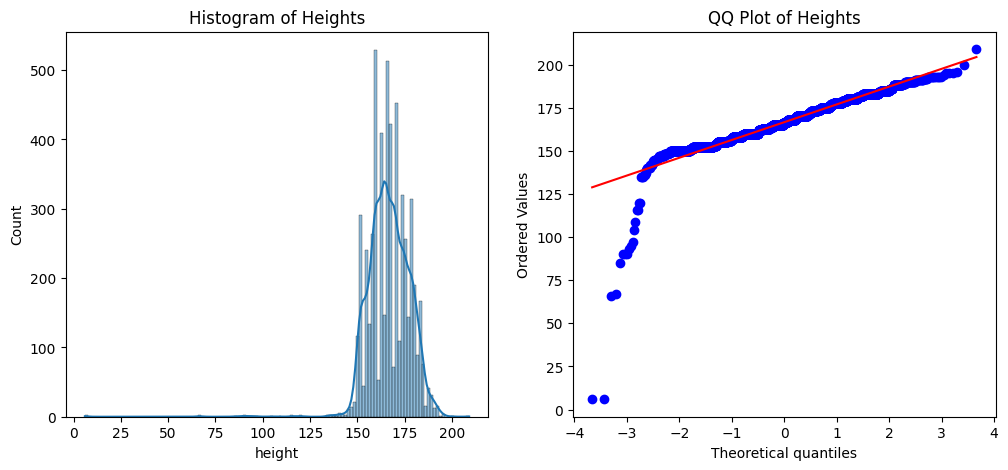

Shapiro-Wilk Test p-value: 2.7979955674452378e-50
Kolmogorov-Smirnov Test p-value: 9.358709043745224e-15
Anderson-Darling Test statistic: 20.851487595788058
Anderson-Darling Critical values: [0.576 0.656 0.786 0.917 1.091]


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5561.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('/content/drive/MyDrive/data_train/train_meta.csv')

if 'height' in df.columns:

    height_data = df['height'].dropna()
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(height_data, kde=True)
    plt.title('Histogram of Heights')
    plt.subplot(1, 2, 2)
    stats.probplot(height_data, dist="norm", plot=plt)
    plt.title('QQ Plot of Heights')
    plt.show()

    shapiro_test = stats.shapiro(height_data)
    print("Shapiro-Wilk Test p-value:", shapiro_test.pvalue)
    ks_test = stats.kstest(height_data, 'norm', args=(height_data.mean(), height_data.std()))
    print("Kolmogorov-Smirnov Test p-value:", ks_test.pvalue)
    anderson_test = stats.anderson(height_data, dist='norm')
    print("Anderson-Darling Test statistic:", anderson_test.statistic)
    print("Anderson-Darling Critical values:", anderson_test.critical_values)
else:
    print("Cột 'height' không tồn tại trong dữ liệu.")


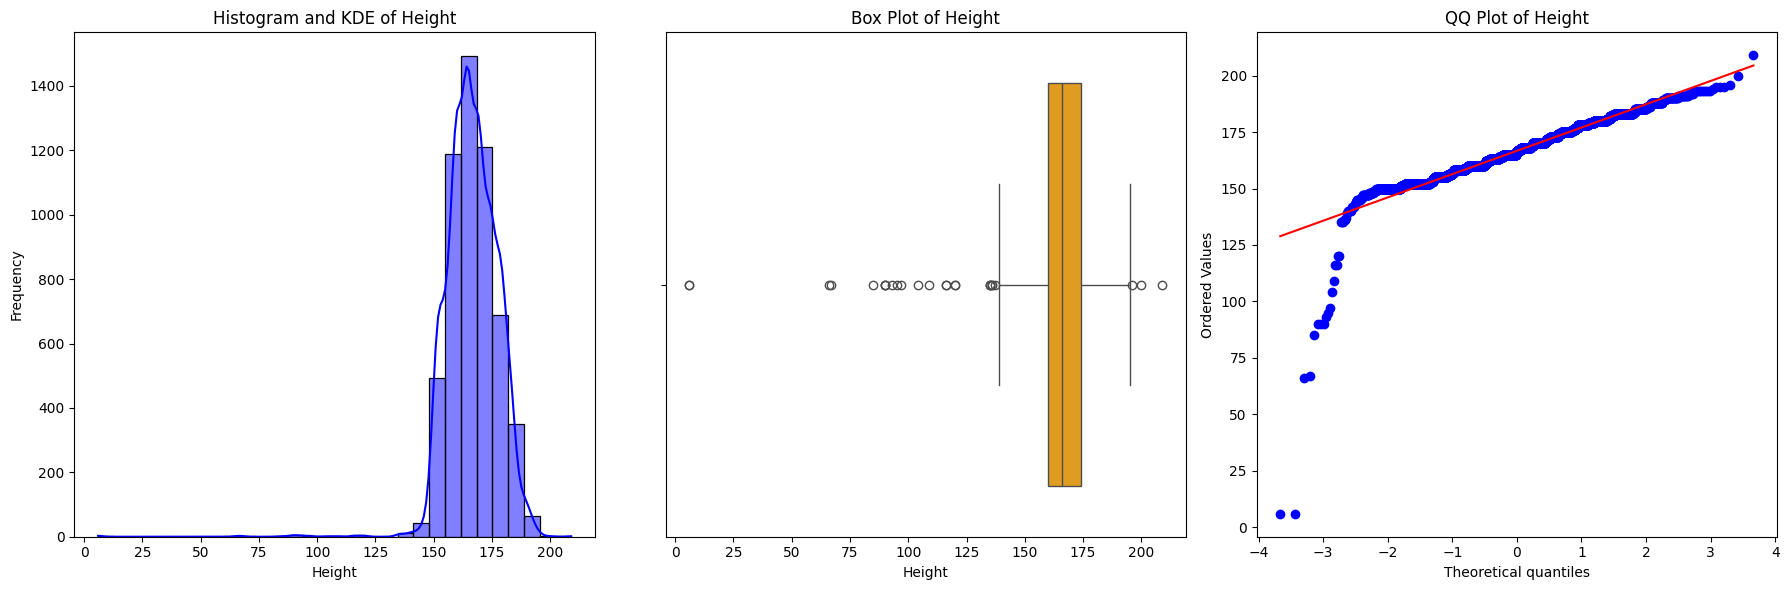

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('/content/drive/MyDrive/data_train/train_meta.csv')

if 'height' in df.columns:
    height_data = df['height'].dropna()

    plt.figure(figsize=(18, 6))

    # Histogram + KDE
    plt.subplot(1, 3, 1)
    sns.histplot(height_data, kde=True, bins=30, color='blue')
    plt.title('Histogram and KDE of Height')
    plt.xlabel('Height')
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=height_data, color='orange')
    plt.title('Box Plot of Height')
    plt.xlabel('Height')

    # QQ Plot
    plt.subplot(1, 3, 3)
    stats.probplot(height_data, dist="norm", plot=plt)
    plt.title('QQ Plot of Height')

    plt.tight_layout()
    plt.show()

else:
    print("Cột 'height' không tồn tại trong dữ liệu.")


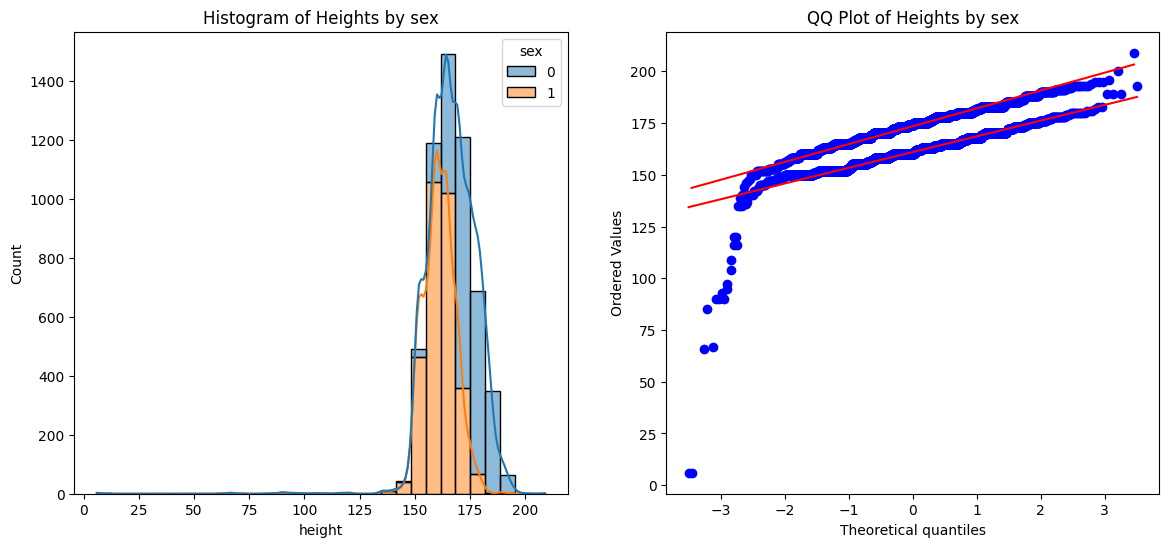


--- Statistics for 0 ---
Shapiro-Wilk Test p-value for 0: 1.4554039499714284e-45
Kolmogorov-Smirnov Test p-value for 0: 1.6295465320376364e-16
Anderson-Darling Test statistic for 0: 27.663271861812063
Anderson-Darling Critical values for 0: [0.575 0.655 0.786 0.917 1.09 ]

--- Statistics for 1 ---
Shapiro-Wilk Test p-value for 1: 1.7283214998294594e-49
Kolmogorov-Smirnov Test p-value for 1: 4.7788844354506205e-19
Anderson-Darling Test statistic for 1: 30.98556781404477
Anderson-Darling Critical values for 1: [0.575 0.655 0.786 0.917 1.091]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('/content/drive/MyDrive/data_train/train_meta.csv')

# Kiểm tra xem cột 'height' và 'sex' có tồn tại trong dữ liệu không
if 'height' in df.columns and 'sex' in df.columns:

    # Loại bỏ giá trị NaN trong cột 'height'
    df_cleaned = df.dropna(subset=['height', 'sex'])

    # Nhóm dữ liệu theo giới tính
    grouped_data = df_cleaned.groupby('sex')['height']

    # Vẽ đồ thị cho chiều cao theo giới tính
    plt.figure(figsize=(14, 6))

    # Đồ thị Histogram theo giới tính
    plt.subplot(1, 2, 1)
    sns.histplot(data=df_cleaned, x='height', hue='sex', kde=True, multiple='stack', bins=30)
    plt.title('Histogram of Heights by sex')

    # Đồ thị QQ plot theo giới tính
    plt.subplot(1, 2, 2)
    for sex, height_data in grouped_data:
        stats.probplot(height_data, dist="norm", plot=plt)
    plt.title('QQ Plot of Heights by sex')

    plt.show()

    # Thực hiện các kiểm tra phân phối cho mỗi nhóm giới tính
    for sex, height_data in grouped_data:
        print(f"\n--- Statistics for {sex} ---")

        # Kiểm tra phân phối của chiều cao
        shapiro_test = stats.shapiro(height_data)
        print(f"Shapiro-Wilk Test p-value for {sex}: {shapiro_test.pvalue}")

        ks_test = stats.kstest(height_data, 'norm', args=(height_data.mean(), height_data.std()))
        print(f"Kolmogorov-Smirnov Test p-value for {sex}: {ks_test.pvalue}")

        anderson_test = stats.anderson(height_data, dist='norm')
        print(f"Anderson-Darling Test statistic for {sex}: {anderson_test.statistic}")
        print(f"Anderson-Darling Critical values for {sex}: {anderson_test.critical_values}")

else:
    print("Cột 'height' hoặc 'sex' không tồn tại trong dữ liệu.")


In [ ]:
print(f"Số giá trị: {df['height'].count()}")
print(f"Số giá trị null: {df['height'].isnull().sum()}")


Số giá trị: 5561
Số giá trị null: 11880


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_train/train_meta.csv')
null_counts = df.isnull().sum()
non_null_counts = df.notnull().sum()
print("Số lượng NaN trong mỗi cột:")
print(null_counts)
print("\nSố lượng không phải NaN trong mỗi cột:")
print(non_null_counts)

Số lượng NaN trong mỗi cột:
ecg_id               0
age                 62
sex                  0
height           11880
weight           10201
nurse             1055
site                15
device               0
NORM                 0
MI                   0
STTC                 0
HYP                  0
CD                   0
sub_NORM             0
sub_IMI              0
sub_STTC             0
sub_NST_             0
sub_LVH              0
sub_LAFB/LPFB        0
sub_RVH              0
sub_IRBBB            0
sub_RAO/RAE          0
sub_IVCD             0
sub_LMI              0
sub_AMI              0
sub__AVB             0
sub_ISCA             0
sub_ISC_             0
sub_SEHYP            0
sub_ISCI             0
sub_CRBBB            0
sub_CLBBB            0
sub_LAO/LAE          0
sub_ILBBB            0
sub_WPW              0
sub_PMI              0
strat_fold           0
dtype: int64

Số lượng không phải NaN trong mỗi cột:
ecg_id           17441
age              17379
sex              17441

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_train/train_meta.csv')

if all(col in df.columns for col in ['age', 'height', 'weight', 'nurse', 'site', 'sex']):

    df_cleaned = df.dropna(subset=['age', 'height', 'weight', 'nurse', 'site', 'sex'])

    median_by_sex = df_cleaned.groupby('sex')[['age', 'height', 'weight']].median()
    print("Trung vị của age, height, weight theo giới tính:")
    print(median_by_sex)

    median_nurse_site = df_cleaned[['nurse', 'site']].median()
    print("\nTrung vị của nurse và site:")
    print(median_nurse_site)

else:
    print("Một số cột cần thiết không tồn tại trong dữ liệu.")


Trung vị của age, height, weight theo giới tính:
      age  height  weight
sex                      
0    65.0   174.0    76.0
1    69.0   160.0    63.0

Trung vị của nurse và site:
nurse    6.0
site     1.0
dtype: float64


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_train/train_meta.csv')
median_by_sex = {
    0: {'age': 65.0, 'height': 174.0, 'weight': 76.0},
    1: {'age': 69.0, 'height': 160.0, 'weight': 63.0}
}
median_nurse_site = {'nurse': 6.0, 'site': 1.0}

df['nurse'] = df['nurse'].fillna(median_nurse_site['nurse'])
df['site'] = df['site'].fillna(median_nurse_site['site'])
df['age'] = df.groupby('sex')['age'].transform(lambda x: x.fillna(median_by_sex[x.name]['age']))
df['height'] = df.groupby('sex')['height'].transform(lambda x: x.fillna(median_by_sex[x.name]['height']))
df['weight'] = df.groupby('sex')['weight'].transform(lambda x: x.fillna(median_by_sex[x.name]['weight']))

print(df.head())


   ecg_id   age  sex  height  weight  nurse  site     device  NORM  MI  ...  \
0       1  56.0    1   160.0    63.0    2.0   0.0  CS-12   E     1   0  ...   
1       2  19.0    0   174.0    70.0    2.0   0.0  CS-12   E     1   0  ...   
2       3  37.0    1   160.0    69.0    2.0   0.0  CS-12   E     1   0  ...   
3       4  24.0    0   174.0    82.0    2.0   0.0  CS-12   E     1   0  ...   
4       5  19.0    1   160.0    70.0    2.0   0.0  CS-12   E     1   0  ...   

   sub_ISC_  sub_SEHYP  sub_ISCI  sub_CRBBB  sub_CLBBB  sub_LAO/LAE  \
0         0          0         0          0          0            0   
1         0          0         0          0          0            0   
2         0          0         0          0          0            0   
3         0          0         0          0          0            0   
4         0          0         0          0          0            0   

   sub_ILBBB  sub_WPW  sub_PMI  strat_fold  
0          0        0        0           3  
1       

In [ ]:
df_signal = pd.read_csv('/content/drive/MyDrive/data_train/train_signal.csv')
# Đếm số điểm tín hiệu cho mỗi ecg_id
signal_counts = df_signal.groupby('ecg_id').size()

print(signal_counts.describe())  # Thống kê cơ bản số điểm/mẫu


count    17441.0
mean      1000.0
std          0.0
min       1000.0
25%       1000.0
50%       1000.0
75%       1000.0
max       1000.0
dtype: float64
